In [4]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [16]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [17]:
features[0], labels[0]

(
 [-0.4121327  1.5227884]
 <NDArray 2 @cpu(0)>,
 
 [-1.816544]
 <NDArray 1 @cpu(0)>)

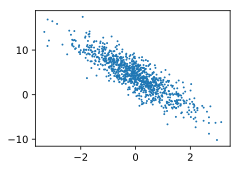

In [18]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [19]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [49]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.4368423   0.3740856 ]
 [-1.3746845   0.06956498]
 [-1.2127628  -0.5387254 ]
 [ 0.06745438 -1.0886768 ]
 [-0.7180889  -0.6909588 ]
 [ 0.8357583  -0.41682816]
 [-0.9872846   0.9007732 ]
 [ 0.21284984  1.3740718 ]
 [ 0.35914764 -0.38115013]
 [ 0.49386823 -0.91457206]]
<NDArray 10x2 @cpu(0)> 
[ 2.056902    1.2157123   3.6061528   8.030824    5.108728    7.294787
 -0.848867   -0.03580727  6.214066    8.279128  ]
<NDArray 10 @cpu(0)>


In [50]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [51]:
w,b

(
 [[ 0.00059183]
  [-0.00173846]]
 <NDArray 2x1 @cpu(0)>,
 
 [0.]
 <NDArray 1 @cpu(0)>)

In [52]:
w.attach_grad()
b.attach_grad()

In [27]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [53]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [54]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.032775
epoch 2, loss 0.000116
epoch 3, loss 0.000052
